In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('netflix.csv')
df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [5]:
#Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.
# Verificar duplicados


if(df.duplicated().any()):
    df = df.drop_duplicates()

df.duplicated().any()




False

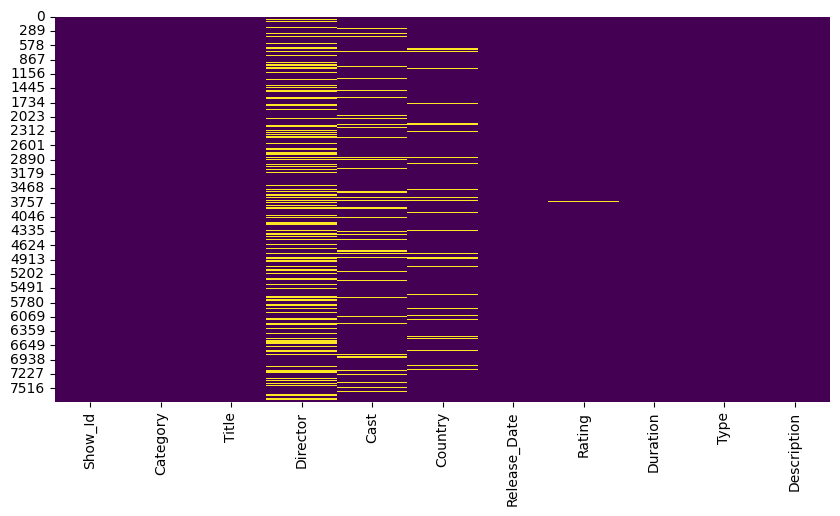

In [6]:
#Task. 2) Is there any Null Value present in any column ? Show with Heat-map.

df.isnull().any()

plt.figure(figsize=(10, 5))  
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.show()

In [7]:
#Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?

House_of_Cards = df[df['Title']=='House of Cards']

House_of_Cards[['Show_Id','Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


C:\Users\mateo\AppData\Local\Temp\ipykernel_10800\686031931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Release_Date'] = pd.to_datetime(df['Release_Date'] ,errors='coerce')


<Axes: xlabel='Release_Date', ylabel='Count'>

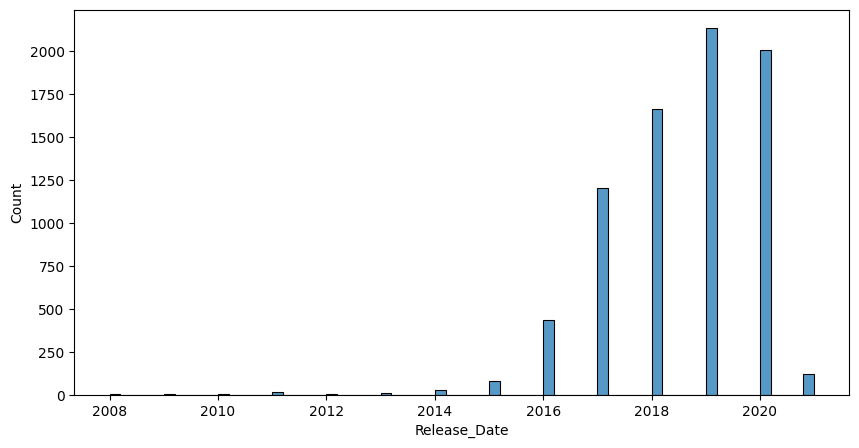

In [8]:
#Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

df['Release_Date'] = pd.to_datetime(df['Release_Date'] ,errors='coerce')

df['Release_Date'].dt.year

plt.figure(figsize =(10,5))
sns.histplot(data=df['Release_Date'].dt.year)

<Axes: xlabel='Category', ylabel='Cantidad'>

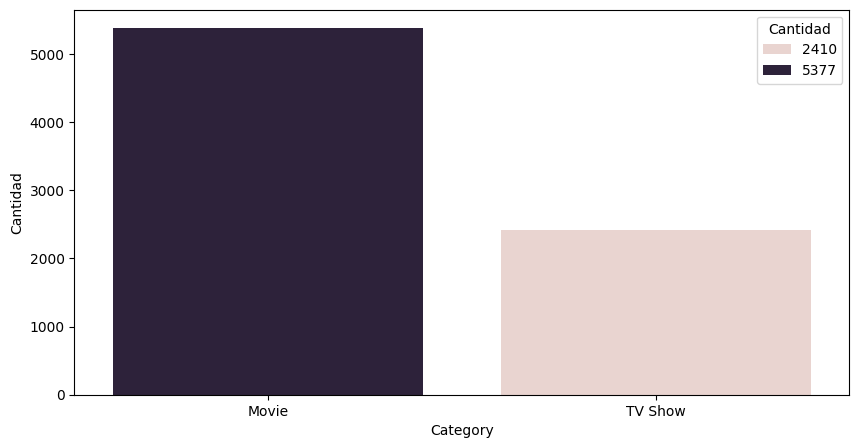

In [46]:
#Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.


fig,ax = plt.subplots(figsize=(10,5))


grouped = df.groupby('Category').size().reset_index()
grouped= grouped.rename(columns={0:'Cantidad'})
#grouped
sns.barplot(data=grouped, x='Category',y='Cantidad',ax=ax, hue='Cantidad')


In [63]:
#Q. 4) Show all the Movies that were released in year 2012.
df[(df['Category']=='Movie') & (df['Release_Date'].dt.year == 2012)]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
818,s819,Movie,Being Elmo: A Puppeteer's Journey,Constance Marks,"Kevin Clash, Whoopi Goldberg",United States,2012-02-21,PG,76 min,Documentaries,Whoopi Goldberg narrates Elmo creator Kevin Cl...
1229,s1230,Movie,Casa de mi Padre,Matt Piedmont,"Will Ferrell, Gael García Bernal, Diego Luna, ...","United States, Mexico",2012-11-14,R,84 min,Comedies,Will Ferrell stars as a Spanish-speaking cowbo...
3466,s3467,Movie,Kung Fu Panda: Holiday,Tim Johnson,"Jack Black, Angelina Jolie, Dustin Hoffman, Ja...",United States,2012-12-01,TV-PG,26 min,"Children & Family Movies, Comedies","As preparations for the Winter Feast build, Po..."


In [71]:
#Q. 5) Show only the Titles of all TV Shows that were released in India only.

data = df[(df['Category']=='TV Show') & (df['Country']=='India')].reset_index()
data = data.drop(columns='index')
data['Title']

0           21 Sarfarosh: Saragarhi 1897
1                              7 (Seven)
2                           Agent Raghav
3                           Akbar Birbal
4                    Anjaan: Rural Myths
                     ...                
66                  The Creative Indians
67    The Golden Years with Javed Akhtar
68                The House That Made Me
69                            Typewriter
70                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

In [83]:
#Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
grouped = df.groupby('Director').size().reset_index()
grouped = grouped.sort_values(0 , ascending = False)
grouped = grouped.rename(columns ={0:'TvShows / Movies'})
grouped

,Director,TvShows / Movies
3078,"Raúl Campos, Jan Suter",18
2321,Marcus Raboy,16
1607,Jay Karas,14
624,Cathy Garcia-Molina,13
2388,Martin Scorsese,12
...,...,...
1806,"Jon Hurwitz, Hayden Schlossberg",1
1807,Jon Izen,1
1808,Jon J. Whelan,1
460,Benjamin Arfmann,1


In [85]:
#Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".

df[(df['Category']=='Movie')&((df['Type']=='Comedies')|(df['Country']=='United Kingdom') )]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,2021-01-01,PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik..."
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,2019-04-16,R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...
...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,2019-05-10,R,104 min,Comedies,When longtime friends meet up for a wine-soake...
7649,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,2017-05-31,TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,2020-08-07,TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc..."


In [126]:
#Q. 8) In how many movies/shows, Tom Cruise was cast ?

TomCruise = df['Cast'].str.split(',').explode().value_counts().reset_index()
#TomCruise = TomCruise['Cast'].str.strip()
#TomCruise = df['Cast'].str.split(',').explode().value_counts().reset_index()
#TomCruise = TomCruise[TomCruise['Cast']==' Paul Merson']
TomCruise['Cast'] = TomCruise['Cast'].str.strip()
TomCruise[TomCruise['Cast']=='Tom Cruise']

,Cast,count
6563,Tom Cruise,2


In [134]:
#Q. 9) What are the different Ratings defined by Netflix ?
df['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [141]:
#Q. 9.1) How many Movies got the 'TV-14' rating, in Canada

grouped = df.groupby(['Rating','Country']).size().reset_index().pivot(columns='Rating',index='Country',values=0)
grouped.loc['Canada','TV-14']

23.0

In [154]:
#Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?

df[(df['Category'] =='TV Show') & (df['Rating'] == 'R') & (df['Release_Date'].dt.year>2018)]


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...


In [185]:
#Q. 10) What is the maximum duration of a Movie on Netflix ?

answer = df[df['Category']=='Movie']

def get_duration (data):
    return data[:-4]

answer['Duration'] = answer['Duration'].apply(get_duration)
answer['Duration'] = pd.to_numeric(answer['Duration'],errors='coerce')
answer['Duration'].max()

C:\Users\mateo\AppData\Local\Temp\ipykernel_10800\2689582143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['Duration'] = answer['Duration'].apply(get_duration)
C:\Users\mateo\AppData\Local\Temp\ipykernel_10800\2689582143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answer['Duration'] = pd.to_numeric(answer['Duration'],errors='coerce')


312

In [199]:
#Q. 11) Which individual country has the Highest No. of TV Shows ?
grouped = df[df['Category'] =='TV Show']
grouped = df.groupby('Country').size().reset_index()
grouped = grouped.rename(columns={0:'No TvShows'})
grouped = grouped.sort_values('No TvShows',ascending=False)
grouped = grouped.reset_index()
grouped = grouped.drop(columns='index')
grouped

,Country,No TvShows
0,United States,2555
1,India,923
2,United Kingdom,397
3,Japan,226
4,South Korea,183
...,...,...
676,"Indonesia, South Korea, Singapore",1
677,"Indonesia, United Kingdom",1
678,"Indonesia, United States",1
679,"Iran, France",1


In [203]:
#Q. 12) How can we sort the dataset by Year ?

sorted = df.sort_values('Release_Date')
sorted

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,2008-02-04,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r..."
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott..."
...,...,...,...,...,...,...,...,...,...,...,...
6952,s6951,TV Show,The Tudors,NaN,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
6998,s6997,TV Show,The West Wing,NaN,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
7448,s7447,TV Show,Vroomiz,NaN,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
7524,s7523,TV Show,Weird Wonders of the World,NaN,Chris Packham,United Kingdom,NaT,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


In [224]:
#Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.


filtered_df = df[
    ((df["Category"] == "Movie") & (df["Type"].str.contains("Dramas"))) |
    ((df["Category"] == "TV Show") & (df["Type"].str.contains("Kids' TV")))
]
filtered_df

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,2017-10-20,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
15,s16,Movie,Oct-01,Kunle Afolayan,"Sadiq Daba, David Bailie, Kayode Olaiya, Kehin...",Nigeria,2019-09-01,TV-14,149 min,"Dramas, International Movies, Thrillers",Against the backdrop of Nigeria's looming inde...
...,...,...,...,...,...,...,...,...,...,...,...
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."
7779,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7782,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,2018-07-01,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
